Plot metrics vs non-dimentional numbers from scaling scheme
======

In [252]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import os

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout
import MetricsPythonTools as mpt


## Functions

In [253]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col

def get_water(exp, run, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%s.csv' %(exp,run)))
    col = df[key]
    return col

def get_column(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name and file name and path. All input 
    variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col



## Loading files and general input

In [254]:
#Exp
CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
#CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size

rc = CGridOut.variables['RC']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers


In [255]:
labels = ['Kv=1E-5, Ki=10',
          'Kv=1E-5, Ki=1,N=5.5E-3',
          'Kv=1E-5, Ki=0.1',
          'Kv=KTv=KSv=1E-4, Ki=1', # run11
          'Kv=KTv=KSv=1E-3, Ki=1,Kt=Ks',#run12
          'Kv=1E-5, Ki=1,N=3.9E-3',#run14
          'Kv=1E-5, Ki=1,N=6.3E-3',#run15
          'Kv=1E-5, Ki=1,N=3.0E-3',#run16
          'Kv=1E-7, Ki=1,KTv=KSv=1E-7',#run17
          'Kv=1E-5, f = 7.7E-5',#run18
          'Kv=1E-5, f = 4.8E-5',#run19
          'Kv=3.8E-5, Ki=1',#run20
          #'Kv=2.8E-5, Ki=1',#run21
          'Kv=1E-7(out), 1E-3(in), Ki=1',# 3Drun04
          'Kv=1E-7(out), 1E-4(in), Ki=1', # 3Drun05
          'Kv=1E-5(out), 1E-3(in), Ki=1',# 3Drun06
          'Kv=1E-5(out), 1E-4(in), Ki=1']# 3Drun07

          
         
wlabels = ['run02 - CNT','run03 - CNT','run04 - CNT','run11 - CNT','run12 - CNT',
           'run14 - CNT','run15 - CNT','run16 - CNT','run17 - CNT','run18 - CNT',
           'run19 - CNT','run20 - CNT',#'run21 - CNT',
           'run04 - 3D','run05 - 3D','run06 - 3D','run07 - 3D']


times = np.arange(0,nt,1)
numTr = len(labels) # number of tracers in total 

In [256]:
# LOAD AREAS
CS1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS1area' )
CS2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS2area' )
CS3A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3area' )
CS3sbA = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3sbarea' )
CS4A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS4area' )
CS5A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS5area' )
AS1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS1area' )
AS2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS2area' )
LID1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID1area' )
LID2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID2area' )


In [257]:
tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1'] # tracer number , constant runs
#tracers_CNT09 = ['1'] # tracer number , average diffusivity runs
#tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case
tracers_CNT02 = ['1'] # tracer number , Kiso=0.1
tracers_CNT04 = ['1'] # tracer number , Kiso=10
#tracers_CNT10 = ['1','2','3'] # tracer number , Kiso=1
tracers_CNT11 = ['2'] # tracer number , Kiso=1, Ks=Kt=10^4
tracers_CNT12 = ['3'] # tracer number , Kiso=1, Ks=Kt=10^3
#tracers_CNT13 = ['1','2','3'] # tracer number , Kiso=1, no stratification
tracers_CNT14 = ['1'] # tracer number , Kiso=1, N 0.0039
tracers_CNT15 = ['1'] # tracer number , Kiso=1, N 0.0063
tracers_CNT16 = ['1'] # tracer number , Kiso=1, N 0.0030
tracers_CNT17 = ['3'] # tracer number , Kiso=1, N 0.0055
tracers_CNT18 = ['1'] # tracer number , Kiso=1,
tracers_CNT19 = ['1'] # tracer number , Kiso=1, 
tracers_CNT20 = ['2'] # tracer number , Kiso=1, N 0039
#tracers_CNT21 = ['3'] # tracer number , Kiso=1, N 0063

# LOAD TRANSPORTS
CS1 = np.zeros((nt-1,numTr))
CS2 = np.zeros((nt-1,numTr))
CS3 = np.zeros((nt-1,numTr))
CS4 = np.zeros((nt-1,numTr))
CS5 = np.zeros((nt-1,numTr))
CS3sb = np.zeros((nt-1,numTr))
AS1 = np.zeros((nt-1,numTr))
AS2 = np.zeros((nt-1,numTr))
LID1 = np.zeros((nt-1,numTr))
LID2 = np.zeros((nt-1,numTr))

CS1a = np.zeros((nt-1,numTr))
CS2a = np.zeros((nt-1,numTr))
CS3a = np.zeros((nt-1,numTr))
CS4a = np.zeros((nt-1,numTr))
CS5a = np.zeros((nt-1,numTr))
CS3sba = np.zeros((nt-1,numTr))
AS1a = np.zeros((nt-1,numTr))
AS2a = np.zeros((nt-1,numTr))
LID1a = np.zeros((nt-1,numTr))
LID2a = np.zeros((nt-1,numTr))

CS1d = np.zeros((nt-1,numTr))
CS2d = np.zeros((nt-1,numTr))
CS3d = np.zeros((nt-1,numTr))
CS4d = np.zeros((nt-1,numTr))
CS5d = np.zeros((nt-1,numTr))
CS3sbd = np.zeros((nt-1,numTr))
AS1d = np.zeros((nt-1,numTr))
AS2d = np.zeros((nt-1,numTr))
LID1d = np.zeros((nt-1,numTr))
LID2d = np.zeros((nt-1,numTr))


kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']
fieldsDiff = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2','LID1i' ,'LID2i']

for ii in tracers_CNT02:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '02', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '02',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '02', ii, fieldsDiff[11] ))

    kk=kk+1


for ii in tracers_CNT03:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '03', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '03',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '03', ii, fieldsDiff[11] ))

    kk=kk+1

for ii in tracers_CNT04:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '04', ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', '04',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[5] )
    AS1d[:,kk] =get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '04', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT11:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '11', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '11', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT12:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '12', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '12', ii, fieldsDiff[11] ))


    kk=kk+1


for ii in tracers_CNT14:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '14', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '14', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT15:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '15', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '15', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT16:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '16', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '16', ii, fieldsDiff[11] ))


    kk=kk+1

 
for ii in tracers_CNT17:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '17', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '17', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT18:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '18', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '18', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT19:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '19', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '19', ii, fieldsDiff[11] ))


    kk=kk+1

for ii in tracers_CNT20:

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '20', ii, fields[9] )

    CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20',ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', '20', ii, fieldsDiff[11] ))


    kk=kk+1

#for ii in tracers_CNT21:

 #   CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[0] )
 #   CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[1] )
 #   CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[2] )
 #   CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[3] )
 #   CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[4] )
 #   CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[5] )
 #   AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[6] )
 #   AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[7] )
 #   LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[8] )
 #   LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', '21', ii, fields[9] )

 #   CS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21',ii,  fieldsDiff[0] )
 #   CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[1] )
 #   CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[2] )
 #   CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii,  fieldsDiff[3] )
 #   CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii,  fieldsDiff[4] )
 #   CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii,  fieldsDiff[5] )
 #   AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii,  fieldsDiff[6] )
 #   AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii,  fieldsDiff[7] )
 #   LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[8] )
 #                 +get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[10] ))
 #   LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[9] )
  #                +get_metrics('CNTDIFF_CS_DIFFFLUX_', '21', ii, fieldsDiff[11] ))


 #   kk=kk+1



for ii in tracers_3D:

    CS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[0] )
    CS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[1] )
    CS3a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[2] )
    CS3sba[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[3] )
    CS4a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[4] )
    CS5a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[5] )
    AS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[6] )
    AS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[7] )
    LID1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[8] )
    LID2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[9] )

    CS1d[:,kk] =  get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[8] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[9] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[11] ))

    kk=kk+1



CS1 = CS1a + CS1d
CS2 = CS2a + CS2d
CS3 = CS3a + CS3d
CS4 = CS4a + CS4d
CS5 = CS5a + CS5d
CS3sb = CS3sba + CS3sbd
AS1 = AS1a + AS1d
AS2 = AS2a + AS2d
LID1 = LID1a+ LID1d
LID2 = LID2a +LID2d

In [258]:
#  LOAD WATER TRANSPORT

water_3D = ['04','05','06','07'] #run number
water_CNT = ['02','03','04','11','12','14','15','16','17','18','19','20']#'21'] # run number , constant runs

numWat = len(water_3D)+len(water_CNT)

wCS1 = np.zeros((nt-1,numWat))
wCS2 = np.zeros((nt-1,numWat))
wCS3 = np.zeros((nt-1,numWat))
wCS4 = np.zeros((nt-1,numWat))
wCS5 = np.zeros((nt-1,numWat))
wCS3sb = np.zeros((nt-1,numWat))
wAS1 = np.zeros((nt-1,numWat))
wAS2 = np.zeros((nt-1,numWat))
wLID1 = np.zeros((nt-1,numWat))
wLID2 = np.zeros((nt-1,numWat))

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']



for ii in water_CNT:

    wCS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[9] )
    kk=kk+1

for ii in water_3D:

    wCS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[9] )

    kk=kk+1


In [259]:
# transport of tracer
vertical = LID1 + LID2
crossShelf = CS1 + CS2 + CS3sb + CS4 + CS5 
total = vertical + crossShelf

# advective transport of tracer
vertical_A = LID1a + LID2a
crossShelf_A = CS1a + CS2a + CS3sba + CS4a + CS5a
total_A = vertical_A + crossShelf_A

# diffusive transport of tracer
vertical_D = LID1d + LID2d
crossShelf_D = CS1d + CS2d + CS3sbd + CS4d + CS5d 
total_D = vertical_D + crossShelf_D

# water transport
watVertical = LID1A[0]*wLID1 + LID2A[0]*wLID2
watCrossShelf  = CS1A[0]*wCS1 + CS2A[0]*wCS2 + CS3sbA[0]*wCS3sb + CS4A[0]*wCS4 + CS5A[0]*wCS5
watTotal = watVertical + watCrossShelf

In [260]:
#(runs: run02, run03, run04, run07, run11, run12, run14, run15, run16, run17, run18, run19, 
#       run20, run043D, run053D, run063D, run073D)

deltaHCW = get_column('results/metricsDataFrames/DeltaTrOnShelf.csv', 'deltaHCW')
deltaTrMass = get_column('results/metricsDataFrames/DeltaTrOnShelf.csv', 'deltaTrMass')

deltaHCW_In = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaHCW_In')
deltaTrMass_In = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaTrMass_In')

deltaHCW_Out = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaHCW_Out')
deltaTrMass_Out = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaTrMass_Out')

In [302]:
### NON-DIMENSIONAL PARAMETERS
kdout = np.array([1.E-5, #run02
                  1.E-5, #run03
                  1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  3.8E-5, #run20
                  #2.8E-5, #run21
                  1.E-7, #3D run04
                  1.E-7, #3D run05
                  1.E-5, #3D run06
                  1.E-5]) #3D run07

kdcan = np.array([1.E-5, #run02
                  1.E-5, #run03
                  1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  3.8E-5, #run20
                  #2.8E-5, #run21
                  1.E-3, #3D run04
                  1.E-4, #3D run05
                  1.E-3, #3D run06
                  1.E-4]) #3D run07


kd_avg = np.array([1.E-5, #run02
                  1.E-5, #run03
                  1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  3.8E-5, #run20
                  #2.8E-5, #run21
                  5.0005E-4,#1.E-3, #3D run04
                  5.005E-5, #3D run05
                  5.05E-4, #3D run06
                  5.5E-5]) #3D run07



ki = np.array([10.0, #run02
               1.0, #run03
               0.1, #run04
               1.0, #run11
               1.0, #run12
               1.0, #run14
               1.0, #run15
               1.0, #run16
               1.0, #run17
               1.0, #run18
               1.0, #run19
               1.0, #run20
               #1.0, #run21
               1.0, #3D run04
               1.0, #3D run05
               1.0, #3D run06
               1.0]) #3D run07


Z = 75.0 

Wsb = 13000 # m
Ush = 0.18 #m/s
Rup = 5000.0 #m
H = 75.0
Hs = 150.0 #m shelf break depth
W = 8300.0 #m width at mid-length

dn = pd.read_csv('results/metricsDataFrames/N_t10max_CM.csv')
                    
Nmes = dn['N']

L = 6400.0 # meters
f = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,7.68E-5,4.84E-5,
             9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5])
Rl = Ush/(f*L)
Dh = (f*L)/N
N_ext = np.array([Nmes[0],Nmes[1],Nmes[2],Nmes[5],Nmes[6],Nmes[7],Nmes[8],Nmes[9],Nmes[10],
                  Nmes[11],Nmes[12],Nmes[13],Nmes[15],Nmes[16],Nmes[17],Nmes[18]])

N = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,3.9E-3,6.3E-3,
              3.0E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3])

Rw = Ush/(f*W)
Fw = Rw/(0.9+Rw)
s = (150.0-20.0)/(90000.0-52000.0)
Se = s*N/(f*((Fw/Rl)**(1/2)))
Bu = (N*Hs)/(f*W)

S_can = (kdcan*N)/((f**2)*(L**2))#kdcan/(N*Hs**2)#
S_out = (N*kdout)/((f**2)*(L**2))

S_I = ((L**2)*N)/ki

Tau_h = (N*(L**(3/2))*(f**(1/2)))/(Ush**(1/2))#N*L*np.sqrt(f*L)/np.sqrt(Ush)
Tau_v = N*np.sqrt(Ush)/((f**(1/2))*(L**(3/2)))#(N**2*Hs*L)/Ush#

Pe_v = ((f**2)*(L**2)*(Rl**(3/2)))/((N**2)*kdcan)
Pe_h = (L*Ush)/ki

Bu_adv = (N_ext*Hs)/(f*W)
S_adv = (kdcan)/(N_ext*Hs**2)

Phi_HA = W*Ush*Dh*(((0.91*Fw**(3/2))*(Rl**(1/2))*((np.ones(np.shape(Dh))-1.21*Se)**3))+(0.07*np.ones(np.shape(Dh))))

rho = 988.0
rhoHs = 1023.5 
rhoZ = 1024.0
g = 9.81
T = 5*24*3600.0
N_adv = np.sqrt(((T*kdout*N**4)/((f**2)*(L**2))) + N**2)
N_adv

array([ 0.00550094,  0.00550094,  0.00550094,  0.00550939,  0.00559323,
        0.00390034,  0.00630141,  0.00300015,  0.00550001,  0.00550149,
        0.00550374,  0.00550357,  0.00550001,  0.00550001,  0.00550094,
        0.00550094])

In [303]:
## FIGURES ##

sns.set_style('darkgrid')

colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst","lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)

marker = ['o','D','o','^','^','o','o','o','^','*','*','^','s','s','s','s']
indexList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
indexEq = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16]



/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


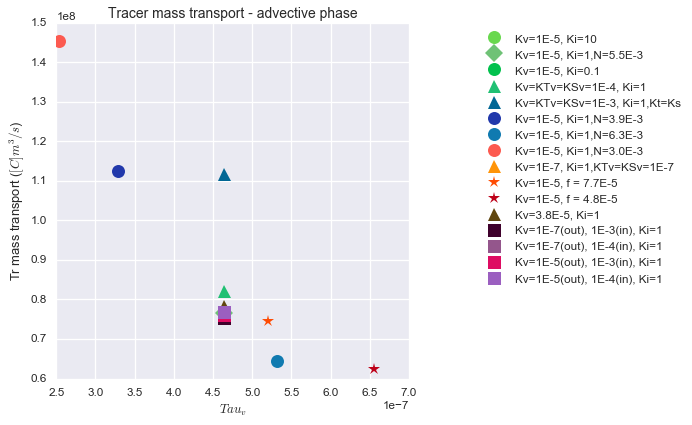

In [304]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    plt.plot( Tau_v[ii] ,deltaTrMass[ee], marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('Tr mass transport ($[C]m^3/s$)')
    plt.xlabel('$Tau_v$')
    plt.title(' Tracer mass transport - advective phase ')
    
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


The transport of tracer mass onto the shelf is well explained by tau_v except if kv varies, also one run with different f does not come to play.

### Fit for $N=N(No,Kv)$

In [305]:
from scipy.optimize import curve_fit

def fitFunc(x, a, b, c, d, e, h, j, k):
    return a + b*x[0] + c*x[1] + d*x[2] + e*x[0]*x[1] + h*x[0]*x[2] + j*x[1]*x[2] + k*x[0]*x[1]*x[2] 

ydata = np.array([Nmes[0],Nmes[1],Nmes[2],Nmes[5],Nmes[6],Nmes[7],Nmes[8],Nmes[9],Nmes[10],Nmes[11],Nmes[12],
                  Nmes[13]]) # Data to fit to: max N at canyon mouth day 5



N_no_f = np.array([5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,3.9E-3,6.3E-3,
                   3.0E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3]) # left out f varying cases

kdout_no_f = np.array([1.E-5, #run02
                  1.E-5, #run03
                  1.E-5, #run04
                  1.E-4, #run11#                
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, # 18
                  1.E-5, # 19
                  3.8E-5]) #run20
                  
x_3d = np.array([N_no_f,kdout_no_f,f[:-4]])
#x_3d = np.array([N,kdout])

fitParams, fitCovariances = curve_fit(fitFunc, x_3d, ydata)
print( ' fit coefficients:\n', fitParams)

a = fitParams[0]
b = fitParams[1]
c = fitParams[2]
d = fitParams[3]
e = fitParams[4]
h = fitParams[5]
j = fitParams[6]
k = fitParams[7]


 fit coefficients:
 [ -6.66082791e-01   1.27051664e+02   1.08708431e+03   6.54844607e+03
  -6.79802285e+05  -1.23423774e+06   2.68743823e+07   1.02289589e+08]


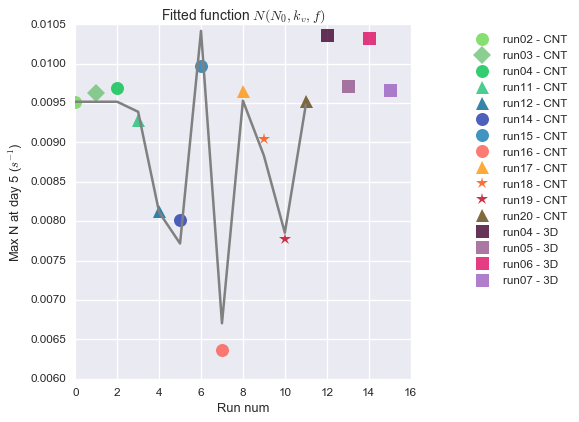

In [306]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})

fig42=plt.figure(figsize=(6,6))
ax5 = plt.subplot(1,1,1)

jj=0

x_all = np.array([N_no_f,kdout_no_f,f[:-4]])
for ii in windexList:
    
    ax5.plot(jj,(N_ext[ii]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.xlabel('Run num')
    plt.ylabel('Max N at day 5 ($s^{-1}$) ')
    plt.title('Fitted function $N(N_0,k_v,f)$')
    jj=jj+1

ax5.plot(fitFunc(x_all,a,b,c,d,e,h,j,k),'gray')
plt.tight_layout()
ax5.legend(loc ='upper right', bbox_to_anchor=(1.5,1))

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


In [316]:
x_all = np.array([N,kdout,f])
Dw = (f*W)/(2.0*N)

Bu_adv2 = (fitFunc(x_all,a,b,c,d,e,h,j,k)*Hs)/(f*W)
Tau_v2 = (fitFunc(x_all,a,b,c,d,e,h,j,k)*np.sqrt(Ush))/((f**(1/2))*(L**(3/2)))
#Bu_adv2 = (N_adv*Hs)/(f*W)
#Tau_v2 = (N_adv*np.sqrt(Ush))/((f**(1/2))*(L**(3/2)))


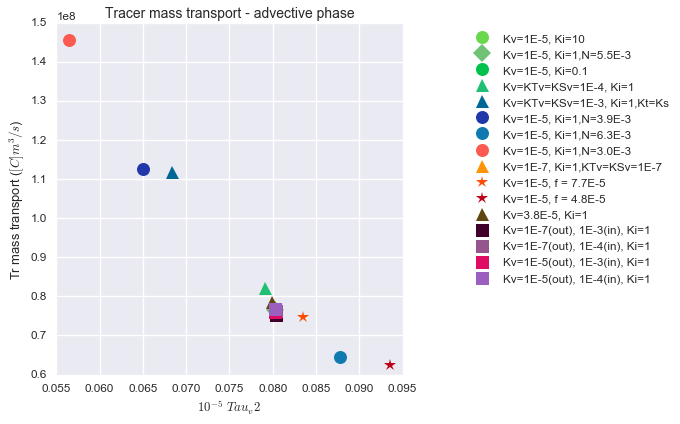

In [321]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    plt.plot(Tau_v2[ii]/1E-5 ,deltaTrMass[ee], marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('Tr mass transport ($[C]m^3/s$)')
    plt.xlabel('$10^{-5}$ $Tau_v2$')
    plt.title(' Tracer mass transport - advective phase ')
    
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


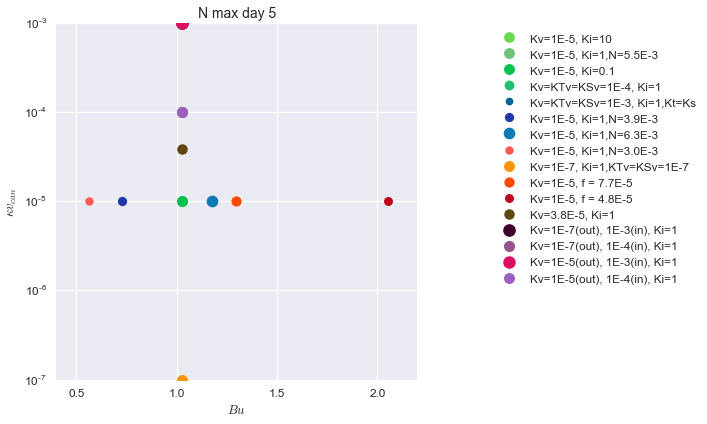

In [268]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    markerSize = (N_ext[ii]/(1.E-3))
    plt.plot( Bu[ii] ,kdcan[ii], 'o', markersize = markerSize,label = labels[ii])
    plt.title('N max day 5')
    plt.xlabel('$Bu$')
    plt.ylabel('$\kappa v_{can}$ ')
    ax1.set_yscale("log", nonposy='clip')
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


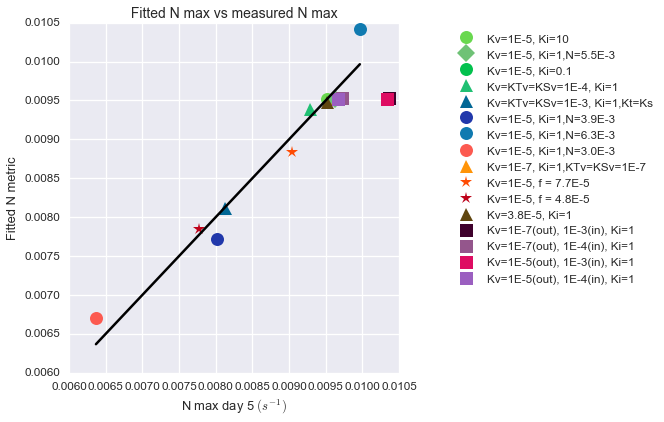

In [322]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    ax1.plot( N_ext[ii] ,fitFunc(x_all[:,ii],a,b,c,d,e,h,j,k), marker[jj], markersize = 13,label = labels[ii])
    
    jj = jj+1

ax1.set_ylabel('Fitted N metric')
ax1.set_xlabel('N max day 5 $(s^{-1})$')
ax1.set_title(' Fitted N max vs measured N max ')
    
ax1.plot([N_ext[7],N_ext[6]],[N_ext[7],N_ext[6]],'k-')
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))

plt.tight_layout()
plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


### HCW

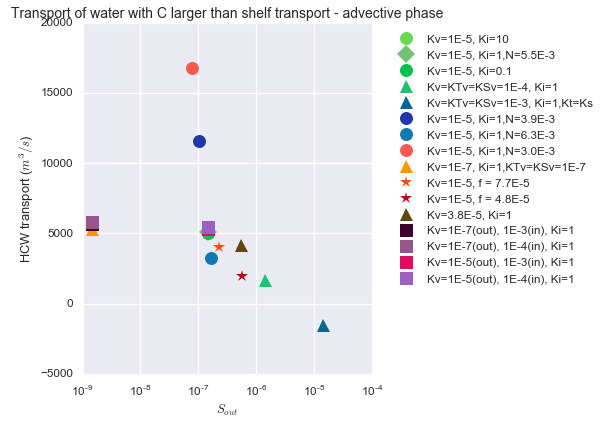

In [325]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    ax1.plot( S_out[ii] ,deltaHCW[ee], marker[jj], markersize = 13,label = labels[ii])
    ax1.set_ylabel('HCW transport ($m^3/s$)')
    ax1.set_xlabel('$S_{out}$')
    ax1.set_title(' Transport of water with C larger than shelf transport - advective phase ')
    ax1.set_xscale("log", nonposy='clip')

    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


## Vertical transports of water, tracer advective and tracer diffusive

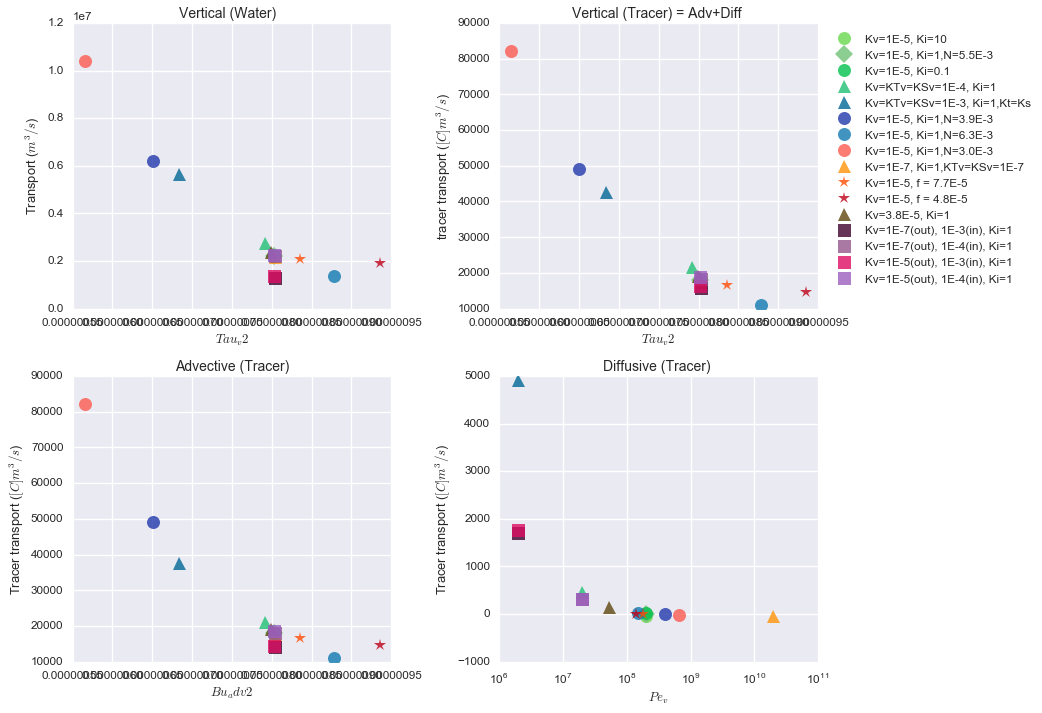

In [333]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii in indexList:
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Tau_v2[ii] , np.mean(watVertical[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Tau_v2$')
    plt.title('Vertical (Water)  ')
    

    ax2 = plt.subplot(2,2,2)
    plt.plot(Tau_v2[ii] , np.mean(vertical[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Tau_v2$')
    plt.title('Vertical (Tracer) = Adv+Diff ')
    #ax7.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Tau_v2[ii] , np.mean(vertical_A[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Advective (Tracer)')
   
    ax4 = plt.subplot(2,2,4)
    plt.plot(Pe_v[ii] ,np.mean(vertical_D[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Pe_v$')
    plt.title('Diffusive (Tracer) ')
    ax4.set_xscale("log", nonposy='clip')


    jj = jj+1

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()


## Total transports (CS + vertical)

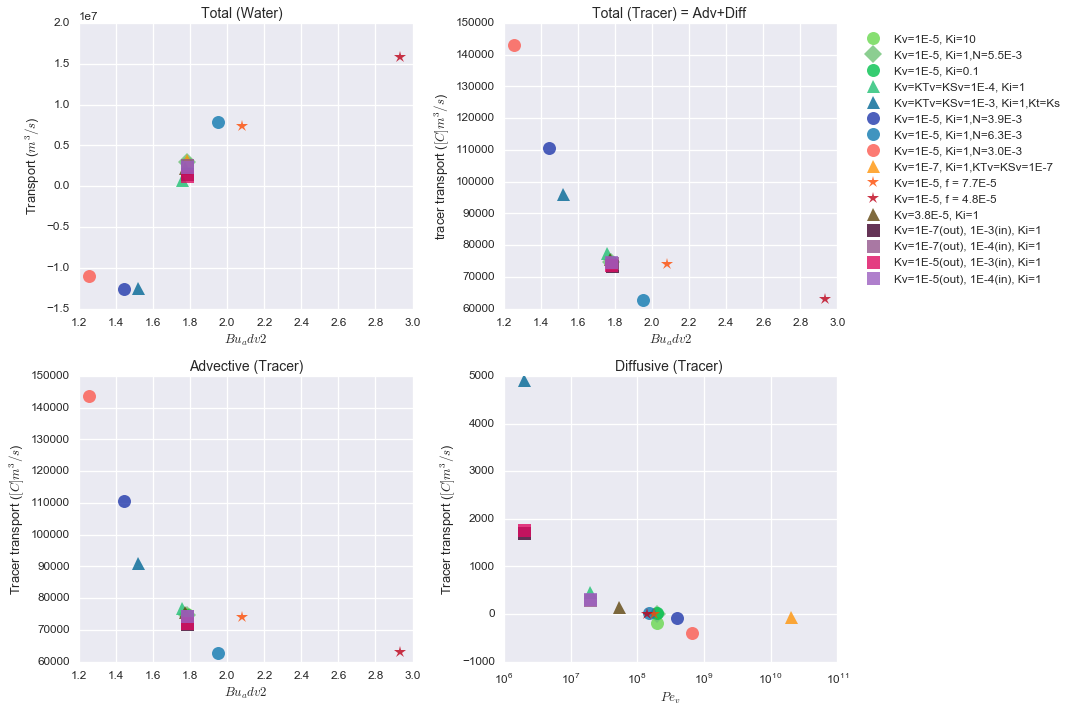

In [334]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii in indexList:
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu_adv2[ii] , np.mean(watCrossShelf[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Total (Water)  ')
    

    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu_adv2[ii] , np.mean(total[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Total (Tracer) = Adv+Diff ')
    #ax7.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu_adv2[ii] , np.mean(total_A[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Advective (Tracer)')
   
    ax4 = plt.subplot(2,2,4)
    plt.plot(Pe_v[ii] ,np.mean(total_D[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Pe_v$')
    plt.title('Diffusive (Tracer) ')
    ax4.set_xscale("log", nonposy='clip')


    jj = jj+1

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()


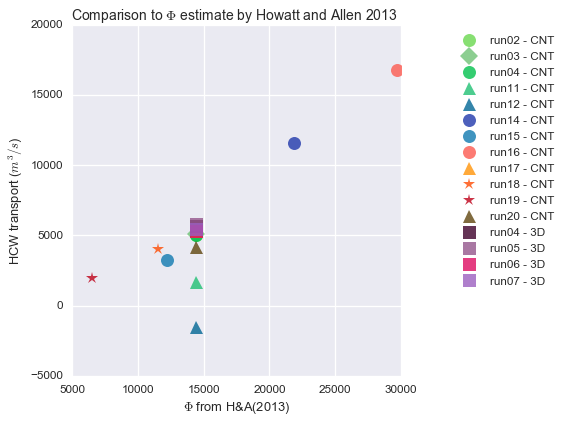

In [335]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax5 = plt.subplot(1,1,1)

    plt.plot(Phi_HA[ii],deltaHCW[ee],wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$\Phi$ from H&A(2013)')
    plt.title('Comparison to $\Phi$ estimate by Howatt and Allen 2013  ')
    #ax5.set_xscale("log", nonposy='clip')
    

plt.tight_layout()
ax5.legend(loc ='upper right', bbox_to_anchor=(1.5,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


### Coastal intrusion

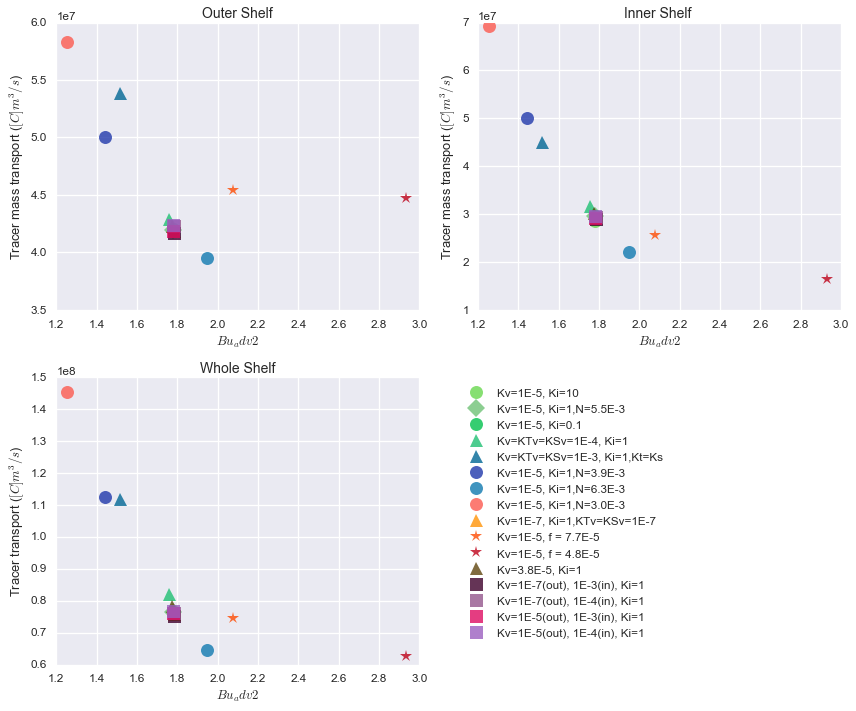

In [338]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii,ee in zip(indexList,indexEq):
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu_adv2[ii] , deltaTrMass_Out[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer mass transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Outer Shelf')
    

    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu_adv2[ii] , deltaTrMass_In[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer mass transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Inner Shelf ')
    #ax7.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu_adv2[ii] , deltaTrMass[ee] ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Whole Shelf')

    jj = jj+1

plt.tight_layout()
ax3.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()


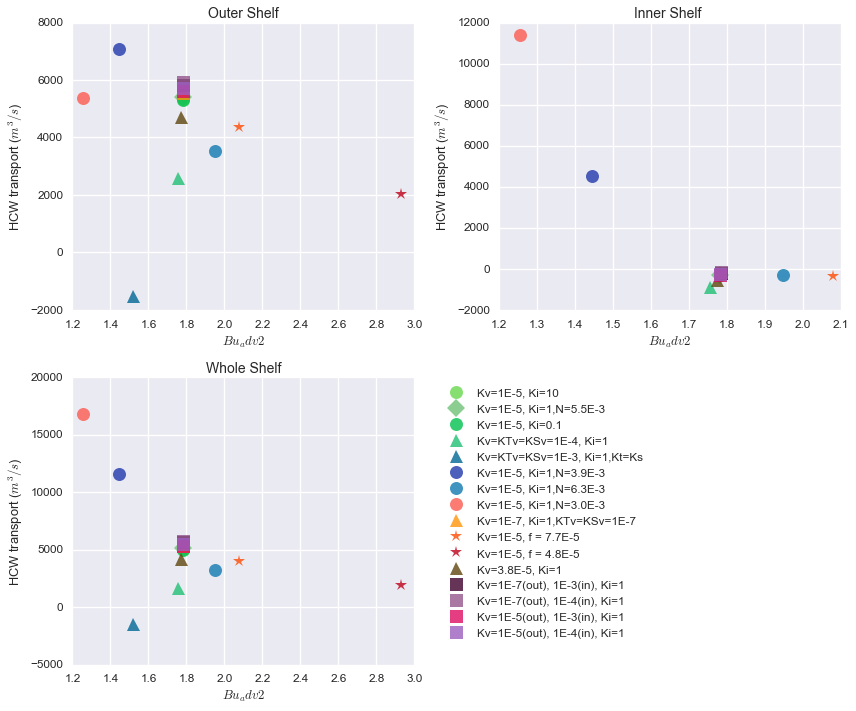

In [340]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii,ee in zip(indexList,indexEq):
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu_adv2[ii] , deltaHCW_Out[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Outer Shelf')
    #ax1.set_xscale("log", nonposy='clip')


    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu_adv2[ii] , deltaHCW_In[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Inner Shelf ')
    #ax2.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu_adv2[ii] , deltaHCW[ee] ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu_adv2$')
    plt.title('Whole Shelf')
    #ax3.set_xscale("log", nonposy='clip')

    jj = jj+1

plt.tight_layout()
ax3.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()
